# Deep Learning - Part 3

## Predicting Gender - Using CNN

#### Asahel Cohen 208925982 | Orya Spiegel 207018524

### Our data https://www.kaggle.com/ashishjangra27/gender-recognition-200k-images-celeba

In [2]:
from keras import models
from keras import layers
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np   # Data manipulation
import pandas as pd   # Dataframe manipulation 
import matplotlib.pyplot as plt   # Plotting the data and the results
import matplotlib.image as mpimg   # For displaying imagees
%matplotlib inline

### Preparing the data

In [3]:
train_generator = ImageDataGenerator(rescale=1./255, rotation_range=30, shear_range=0.3, zoom_range=0.3)
test_generator = ImageDataGenerator(rescale=1./255)

In [4]:
trainData = train_generator.flow_from_directory('C:\Train' ,target_size=(250,250), batch_size=48, class_mode='binary')

Found 160000 images belonging to 2 classes.


In [5]:
validData = test_generator.flow_from_directory("C:\Validation", target_size=(250,250), batch_size=48, class_mode='binary')

Found 22598 images belonging to 2 classes.


In [6]:
test_generator1 = ImageDataGenerator(rescale=1./255)
test_generator = test_generator1.flow_from_directory('C:\Test', target_size=(250,250), batch_size=32, class_mode='binary')

Found 20001 images belonging to 2 classes.


### Visualization

In [7]:
def show_25_images(images,label):
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        l=[label[i]][0]
        if l.round() == 1:
            l = 'Male'
        else: l ='Female'
        plt.title(l)
        plt.axis("off")

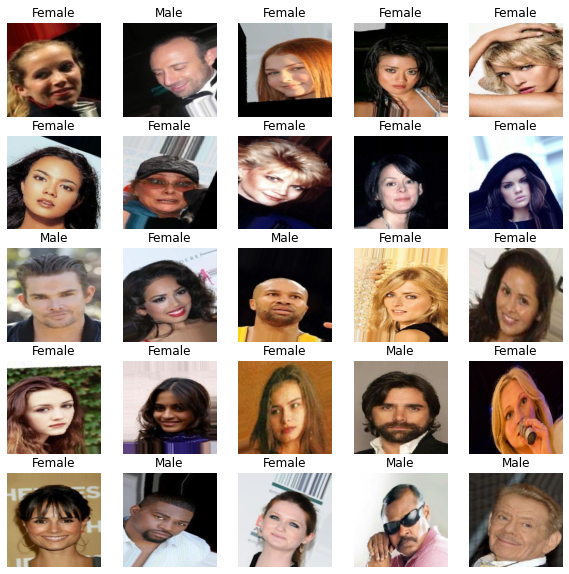

In [8]:
train_images,train_labels= trainData[1] 

show_25_images(train_images,train_labels)

## Starting with LR and MLP - Part 2

## Logistic Regression

In [9]:
input_shape = trainData[0][0][0].shape

In [10]:
model = models.Sequential()
model.add(layers.Flatten(input_shape = [250, 250, 3]))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 187500)            0         
                                                                 
 dense (Dense)               (None, 1)                 187501    
                                                                 
Total params: 187,501
Trainable params: 187,501
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [12]:
history = model.fit(trainData,steps_per_epoch=35,epochs=10,validation_data=validData,validation_steps=50)

Epoch 1/10
35/35 [==============================] - 42s 1s/step - loss: 6.2800 - acc: 0.5518 - val_loss: 2.0594 - val_acc: 0.6458
Epoch 2/10
35/35 [==============================] - 40s 1s/step - loss: 1.2419 - acc: 0.6613 - val_loss: 0.8076 - val_acc: 0.7175
Epoch 3/10
35/35 [==============================] - 39s 1s/step - loss: 1.8880 - acc: 0.6060 - val_loss: 1.8994 - val_acc: 0.6521
Epoch 4/10
35/35 [==============================] - 39s 1s/step - loss: 1.6732 - acc: 0.6357 - val_loss: 1.0044 - val_acc: 0.7192
Epoch 5/10
35/35 [==============================] - 39s 1s/step - loss: 1.4059 - acc: 0.6446 - val_loss: 3.1040 - val_acc: 0.4746
Epoch 6/10
35/35 [==============================] - 39s 1s/step - loss: 3.2709 - acc: 0.5810 - val_loss: 1.2708 - val_acc: 0.7300
Epoch 7/10
35/35 [==============================] - 38s 1s/step - loss: 1.3500 - acc: 0.7018 - val_loss: 0.7313 - val_acc: 0.7912
Epoch 8/10
35/35 [==============================] - 40s 1s/step - loss: 1.6341 - acc: 0.66

<Figure size 432x288 with 0 Axes>

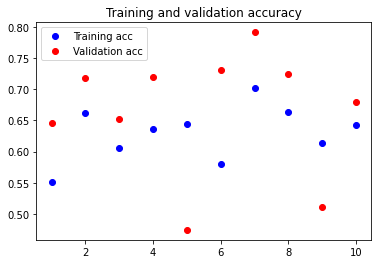

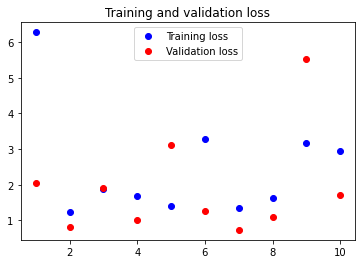

<Figure size 432x288 with 0 Axes>

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [14]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=35)
print('test accuracy:', test_accuracy)
print('test_loss:',test_loss)

35/35 [==============================] - 2s 59ms/step - loss: 1.6152 - acc: 0.6955
test accuracy: 0.6955357193946838
test_loss: 1.6152007579803467


## Neural Network - MLP

In [15]:
NNmodel = models.Sequential()
NNmodel.add(layers.Flatten(input_shape = [250, 250, 3]))
NNmodel.add(layers.Dense(256,activation='relu'))
NNmodel.add(layers.Dense(256,activation='relu'))
NNmodel.add(layers.Dense(1,activation='sigmoid'))
NNmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 187500)            0         
                                                                 
 dense_1 (Dense)             (None, 256)               48000256  
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 48,066,305
Trainable params: 48,066,305
Non-trainable params: 0
_________________________________________________________________


In [16]:
NNmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [17]:
history = NNmodel.fit(trainData, steps_per_epoch=35, epochs=10, validation_data=validData, validation_steps=50)

Epoch 1/10
35/35 [==============================] - 50s 1s/step - loss: 11.1463 - acc: 0.5571 - val_loss: 4.0825 - val_acc: 0.5104
Epoch 2/10
35/35 [==============================] - 47s 1s/step - loss: 3.9474 - acc: 0.5726 - val_loss: 2.2425 - val_acc: 0.5921
Epoch 3/10
35/35 [==============================] - 51s 1s/step - loss: 1.5324 - acc: 0.6107 - val_loss: 1.4109 - val_acc: 0.5708
Epoch 4/10
35/35 [==============================] - 51s 1s/step - loss: 1.2823 - acc: 0.6244 - val_loss: 0.6851 - val_acc: 0.7050
Epoch 5/10
35/35 [==============================] - 48s 1s/step - loss: 1.7003 - acc: 0.5952 - val_loss: 2.6779 - val_acc: 0.4133
Epoch 6/10
35/35 [==============================] - 52s 2s/step - loss: 1.3407 - acc: 0.6137 - val_loss: 0.8615 - val_acc: 0.5871
Epoch 7/10
35/35 [==============================] - 50s 1s/step - loss: 0.6368 - acc: 0.6940 - val_loss: 0.5930 - val_acc: 0.7113
Epoch 8/10
35/35 [==============================] - 50s 1s/step - loss: 0.6226 - acc: 0.6

<Figure size 432x288 with 0 Axes>

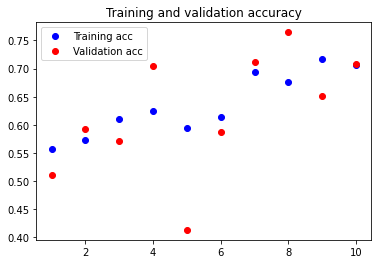

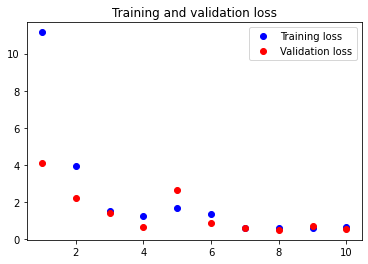

<Figure size 432x288 with 0 Axes>

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [19]:
test_loss, test_accuracy = NNmodel.evaluate(test_generator, steps=32)
print('test accuracy:', test_accuracy)
print('test_loss:',test_loss)

32/32 [==============================] - 3s 92ms/step - loss: 0.5250 - acc: 0.7285
test accuracy: 0.728515625
test_loss: 0.5249966979026794


## CNN

In [5]:
kernel_s=(4,4) #kernel

In [6]:
CNNmodel = models.Sequential()
CNNmodel.add(layers.Conv2D(32,kernel_s,activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
CNNmodel.add(layers.MaxPooling2D((2,2)))

CNNmodel.add(layers.Conv2D(64,kernel_s,activation='relu'))
CNNmodel.add(layers.MaxPooling2D((2,2)))

CNNmodel.add(layers.AveragePooling2D())

CNNmodel.add(layers.Conv2D(128,kernel_s,activation='relu'))
CNNmodel.add(layers.MaxPooling2D((2,2)))

CNNmodel.add(layers.AveragePooling2D())

CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dense(256, activation='relu'))
CNNmodel.add(layers.Dense(1, activation='sigmoid'))
CNNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 average_pooling2d (AverageP  (None, 30, 30, 64)       0         
 ooling2D)                                                       
                                                        

In [7]:
CNNmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [9]:
history=CNNmodel.fit(trainData,steps_per_epoch=35,epochs=30,
                  validation_data=validData,validation_steps=50)

Epoch 1/30
35/35 [==============================] - 115s 3s/step - loss: 0.2987 - acc: 0.8738 - val_loss: 0.2048 - val_acc: 0.9158
Epoch 2/30
35/35 [==============================] - 114s 3s/step - loss: 0.3182 - acc: 0.8702 - val_loss: 0.2281 - val_acc: 0.9062
Epoch 3/30
35/35 [==============================] - 123s 4s/step - loss: 0.2975 - acc: 0.8810 - val_loss: 0.2110 - val_acc: 0.9187
Epoch 4/30
35/35 [==============================] - 116s 3s/step - loss: 0.2938 - acc: 0.8732 - val_loss: 0.1948 - val_acc: 0.9304
Epoch 5/30
35/35 [==============================] - 106s 3s/step - loss: 0.2896 - acc: 0.8774 - val_loss: 0.2103 - val_acc: 0.9196
Epoch 6/30
35/35 [==============================] - 117s 3s/step - loss: 0.2766 - acc: 0.8851 - val_loss: 0.2332 - val_acc: 0.9129
Epoch 7/30
35/35 [==============================] - 106s 3s/step - loss: 0.2937 - acc: 0.8732 - val_loss: 0.1853 - val_acc: 0.9287
Epoch 8/30
35/35 [==============================] - 102s 3s/step - loss: 0.2733 - a

<Figure size 432x288 with 0 Axes>

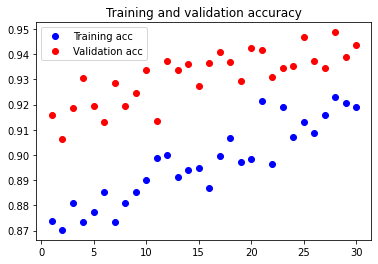

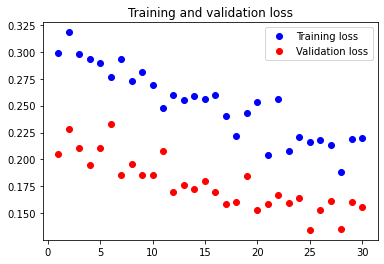

<Figure size 432x288 with 0 Axes>

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [16]:
test_loss, test_accuracy = CNNmodel.evaluate(test_generator, steps=32)
print('test accuracy:', test_accuracy)
print('test_loss:',test_loss)

32/32 [==============================] - 25s 798ms/step - loss: 0.1333 - acc: 0.9404
test accuracy: 0.9404296875
test_loss: 0.1332940310239792


#### Final result for CNN: Accuracy=0.94 